In [3]:
# Assignment 3
# Multiple Linear Regression on energy dataset
# Abhay Charan Patro 
# BTECH/10021/18
# CSE B

In [4]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn import linear_model
from sklearn import metrics

In [5]:
# Reading the data
data=pd.read_csv("Energy.txt")

In [6]:
# Describing the data
data.describe()

,# T,V,AP,RH,EP
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818,454.431293
std,7.475256,12.751468,5.964863,14.625093,17.134571
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.470000,41.740000,1009.010000,63.202500,439.737500
50%,20.315000,52.050000,1012.910000,74.895000,451.740000
75%,25.720000,66.540000,1017.302500,84.925000,468.667500
max,35.770000,81.560000,1033.300000,100.160000,495.760000


In [7]:
# First few entries of the data
data.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [8]:
# Checking for empty data fields
flag=data.isnull().values.any()
if(flag):
  print("The data set contains empty field")
else:
  print("The data set does'nt contain any empty field")

The data set does'nt contain any empty field


In [9]:
# Splitting the data into train and test set
X=data.iloc[:,0:4]
y=data.iloc[:,4]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [10]:
# Mean Normalizing the data 
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.reshape(y_train.shape[0],1);

**METHOD 1 - Using Sci-kit Learn Library**

In [11]:
# Fitting the model to X_train and y_train
cf = linear_model.LinearRegression()
cf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Making Predictions on the test set
y_pred=cf.predict(X_test)

In [13]:
# Printing different errors 
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error :   3.641520704401655
Mean Squared Error :   20.338746240568465
Root Mean Squared Error :   4.509849913308476


In [14]:
# Printing the R-squared metric
r2_sklearn=metrics.r2_score(y_test,y_pred)
print("The R-squared metric using sk-learn is ",r2_sklearn)

The R-squared metric using sk-learn is  0.9295025788888989


**METHOD 2 - Writting the algorithm manually**

In [15]:
# Cost function
def computecost(X,y,params):
  H=np.matmul(X,params)
  H=H-y
  H=np.matmul(np.transpose(H),H)
  J=H/(2*X.shape[0])
  return J

In [16]:
# Defining the gradient descent function
def Gradientdescent(alpha,iteration,X,y):
  # To return parameters m and b
  prev_error=0
  size=X.shape[0]
  params=np.random.rand(X.shape[1]+1,1)
  a=np.ones(size)
  a=a.reshape(size,1)
  X=np.concatenate((a,X),axis=1)
  Jhist=computecost(X,y,params)
  iter=[]
  cost=[]
  for i in range(0,iteration):
    cost.append(Jhist[0])
    iter.append(i+1)
    gama=np.matmul(X,params) 
    gama=gama-y  
    gama=(np.matmul(np.transpose(gama),X))/size
    params=params-alpha*np.transpose(gama)
    Jnew=computecost(X,y,params)
    Jhist=Jnew
  cost=np.array(cost)
  iter=np.array(iter)
  return cost,iter,params

In [17]:
# Defining the prediction function
def predictor(params,X):
  size=X.shape[0]
  a=np.ones(size)
  a=a.reshape(size,1)
  X=np.concatenate((a,X),axis=1)
  return np.matmul(X,params)

In [18]:
# Running Gradient Descent
cost,iter,params=Gradientdescent(0.03,4000,X_train,y_train)

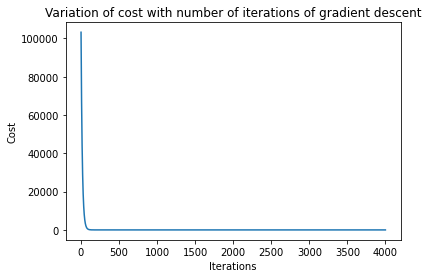

In [19]:
# Plotting the variation of cost with number of iterations of gradient descent
plt.plot(iter,cost)
plt.title("Variation of cost with number of iterations of gradient descent")
plt.xlabel("Iterations")
plt.ylabel('Cost')
plt.show()

In [20]:
# Predicting the values of the test set
y_pred_manual=predictor(params,X_test)

In [21]:
# Printing different errors 
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_pred_manual))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_pred_manual))
print('Root Mean Squared Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_manual)))

Mean Absolute Error :   3.6415220848846515
Mean Squared Error :   20.338755922924925
Root Mean Squared Error :   4.509850986776051


In [22]:
# Finding the r2_metric for our manually written algo
r2_manual=metrics.r2_score(y_test,y_pred_manual)
print("The R-squared metric using our own manual algo is ",r2_manual)

The R-squared metric using our own manual algo is  0.9295025453282677


**Comparing Scikit-Learn's model with our model**

In [23]:
print("The parameters learnt using our manual algo are ",params[0][0],", ",params[1][0],", ",params[2][0])
print("The parameters learnt using sklearn library are ",cf.intercept_[0],", ",cf.coef_[0][0],", ",cf.coef_[0][1])

The parameters learnt using our manual algo are  454.5316585365845 ,  -14.785866412757311 ,  -3.0375547036437176
The parameters learnt using sklearn library are  454.5316585365854 ,  -14.78590721235076 ,  -3.0375243552597753


In [24]:
print("The R-squared metric using our own manual algo is ",r2_manual)
print("The R-squared metric using sk-learn is ",r2_sklearn)

The R-squared metric using our own manual algo is  0.9295025453282677
The R-squared metric using sk-learn is  0.9295025788888989


Hence we can see that our model is giving almost same results to that of Scikit-Learn's Model